https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv/data

Two of the most Supervised learning algorithm tasks are Regression (predicting some value) and Classification (Predicting Class). It can be performed on both structure and unstructured data. The process start with predicting the class are often referred to as target, label or category.

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. Examples of classification problems include, classify if email is spam or not.

Classification Algorithms

        logistic regression
        K- Nearest neigh.
        DEcision Tree
        Naive Bayes
        Random Forest
        SVM
        Artificial Neural Network

Classifier — It is an algorithm, which maps input data to a class, Example — Logistic Regression, K-Nearest Neighbor, SVM Vector etc.

Classification Model — It predict the class of the input

Binary Classification — There are only two outcomes (or class) on the input, whether it belongs or not.
    
        !bu problemde kullanılacak olan bu Binary Classification!

Train-Set — To train the model using the train-set part of the sample

Test-Set — To predict the class of test-set to measure the accuracy.

Predict — To Predict the class of the input

Evaluation — is to evaluate your model, how does it perform.

Classification Report
Classification report consist of following, before discussing them we will learn about the confusion matrix, from there, we can easily drive these from confusion matrix.

· Accuracy
     TN+TP/TP+FP+TN+FN

· Precision
     TP/TP+FP

· Recall
     TP/TP+FP

· FBeta Score
    
    
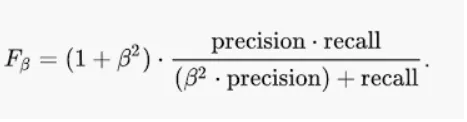


·F1-Score:


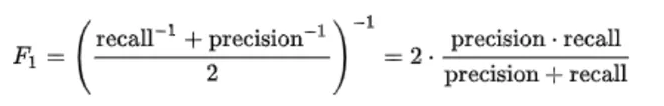


Legend:  

     TP:TruePositive

     TN:TrueNegative

     FP:FalsePositive

     FN:FalseNegative
     

https://www.youtube.com/watch?v=2SiCPhiOkdE

Classification with Logistic regression Inc Math, Code and Graph: https://www.youtube.com/watch?v=eeqqGbeZiUU&t=33s

Performance Measure HoldOut Method : https://www.youtube.com/watch?v=TOOPFvmuCm4

Performance Measure Cross-Validation method: https://www.youtube.com/watch?v=HueJshLT80o

Performance Measure Cross-Validation method: https://www.youtube.com/watch?v=2SiCPhiOkdE

Performance Measure ROC-AUC Curve Method : https://www.youtube.com/watch?v=LFOkEpBp0MM


https://www.kaggle.com/code/zabihullah18/email-spam-detection

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz

In [3]:
data = pd.read_csv("emails.csv")

In [4]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
data.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [7]:
data.drop(columns=['Email No.'] , inplace = True)

In [8]:
data.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [9]:
data.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [10]:
data.shape

(5172, 3001)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [12]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [13]:
# data.corr()

Text(0.5, 1.0, 'Number of Spam and Ham')

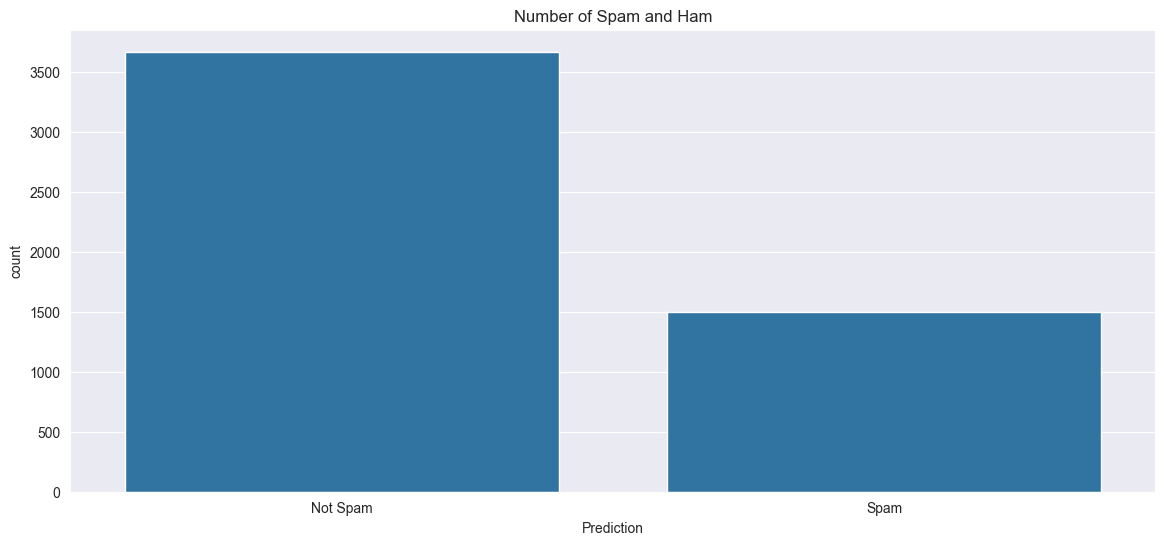

In [16]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='Prediction',data=data)
plt.xticks([0,1],['Not Spam','Spam'])
plt.title('Number of Spam and Ham')

In [17]:
data = data.iloc[:, 1:]
data

,to,ect,and,for,of,a,you,hou,in,on,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,24,6,6,2,102,1,27,18,21,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,8,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,5,22,0,5,1,51,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
4,6,17,1,5,2,57,0,9,3,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,32,0,0,5,6,...,0,0,0,0,0,0,0,0,0,0
5168,27,11,2,6,5,151,4,3,23,18,...,0,0,0,0,0,0,0,1,0,0
5169,0,1,1,0,0,11,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5170,7,1,0,2,1,28,2,0,8,11,...,0,0,0,0,0,0,0,1,0,1


In [18]:
X = data.iloc[:, :3000]
X

,to,ect,and,for,of,a,you,hou,in,on,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,24,6,6,2,102,1,27,18,21,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,8,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,5,22,0,5,1,51,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
4,6,17,1,5,2,57,0,9,3,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,32,0,0,5,6,...,0,0,0,0,0,0,0,0,0,0
5168,27,11,2,6,5,151,4,3,23,18,...,0,0,0,0,0,0,0,1,0,0
5169,0,1,1,0,0,11,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5170,7,1,0,2,1,28,2,0,8,11,...,0,0,0,0,0,0,0,1,0,1


In [19]:
y = data.iloc[:, -1]
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

In [23]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

c:\Users\Casper\OneDrive\Masaüstü\data\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Precision :  0.9735099337748344
Recall :  0.9692307692307692
Accuracy :  0.9832474226804123
F1 Score :  0.9713656387665198

[[1085   12]
 [  14  441]] 



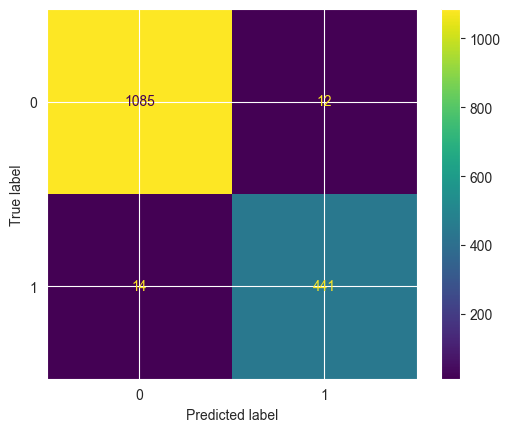

In [96]:
y_pred_LR = model_LR.predict(X_test)
perform(y_pred_LR)

In [25]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1097
           1       0.97      0.97      0.97       455

    accuracy                           0.98      1552
   macro avg       0.98      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552



veri unique liğine bak

In [26]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[1097    0]
 [   0  455]] 



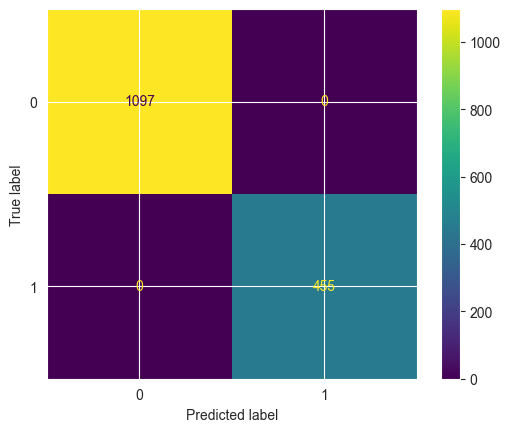

In [97]:
y_pred_XGB = model_XGB.predict(X_test)
perform(y_pred_XGB)

In [28]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1097
           1       1.00      1.00      1.00       455

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552



In [29]:
model_SVC = SVC()
model_SVC.fit(X_train, y_train)

SVC()

Precision :  0.9166666666666666
Recall :  0.3626373626373626
Accuracy :  0.803479381443299
F1 Score :  0.5196850393700787

[[1082   15]
 [ 290  165]] 



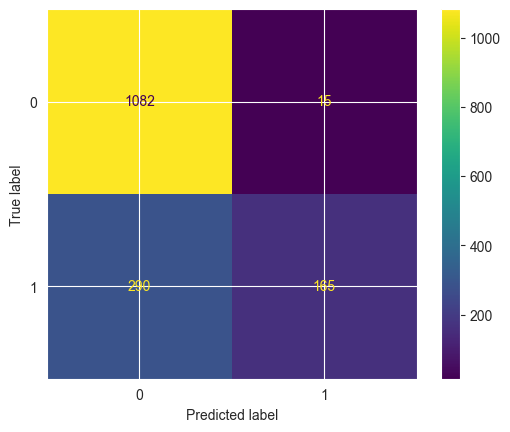

In [98]:
y_pred_SVC = model_SVC.predict(X_test)
perform(y_pred_SVC)

In [31]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1097
           1       0.92      0.36      0.52       455

    accuracy                           0.80      1552
   macro avg       0.85      0.67      0.70      1552
weighted avg       0.83      0.80      0.77      1552



In [32]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

Precision :  0.9955947136563876
Recall :  0.9934065934065934
Accuracy :  0.9967783505154639
F1 Score :  0.9944994499449945

[[1095    2]
 [   3  452]] 



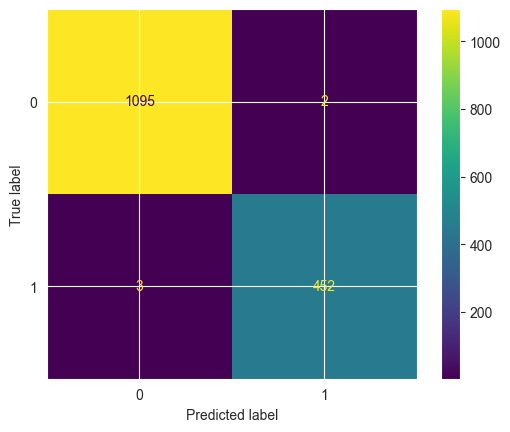

In [99]:
y_pred_NB = model_NB.predict(X_test)
perform(y_pred_NB)

In [34]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1097
           1       1.00      0.99      0.99       455

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552



In [45]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[1097    0]
 [   0  455]] 



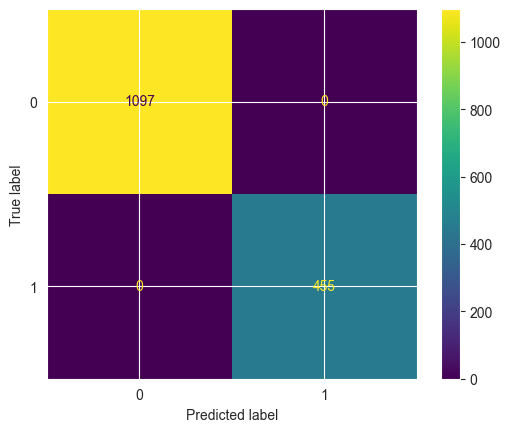

In [100]:
y_pred_DT = model_DT.predict(X_test)
perform(y_pred_DT)

In [47]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1097
           1       1.00      1.00      1.00       455

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552



In [48]:
model_RF = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

Precision :  0.9930715935334873
Recall :  0.945054945054945
Accuracy :  0.9819587628865979
F1 Score :  0.9684684684684685

[[1094    3]
 [  25  430]] 



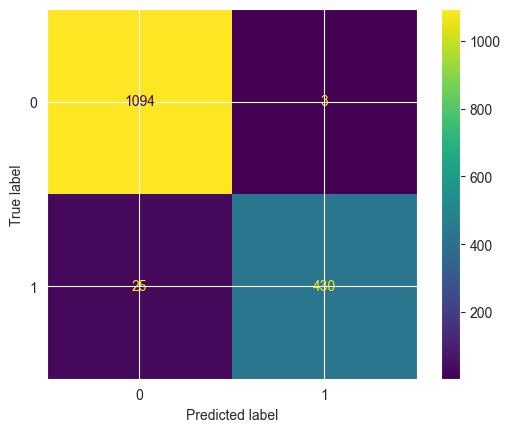

In [101]:
y_pred_RF = model_RF.predict(X_test)
perform(y_pred_RF)

In [50]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1097
           1       0.99      0.95      0.97       455

    accuracy                           0.98      1552
   macro avg       0.99      0.97      0.98      1552
weighted avg       0.98      0.98      0.98      1552

